# TODO
* Add global inhibition

In [192]:
import math
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp

Text(0.5, 1.0, 'Weights with Gaussian Kernel')

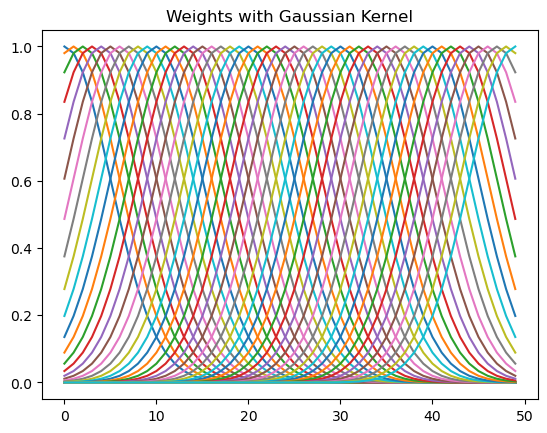

In [199]:
num_nodes = 50
num_time_steps = 10

w = np.zeros((num_nodes, num_nodes))
width = 0.2
for r in range(1, num_nodes + 1):
    for c in range(1, num_nodes + 1):
        w[r - 1][c - 1] = math.exp(-math.pow(r - c, 2) / 2 * math.pow(width, 2))

plt.plot(np.arange(num_nodes), w);
plt.title("Weights with Gaussian Kernel")

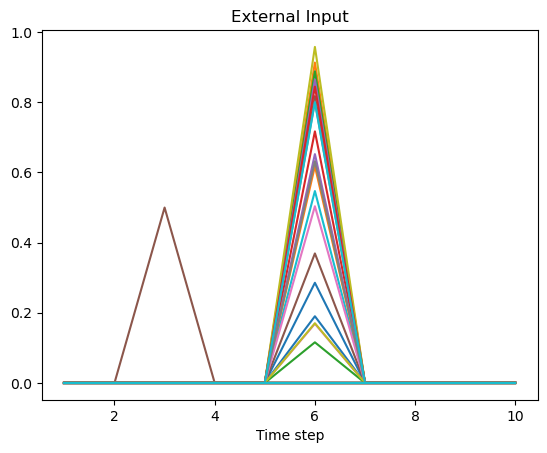

In [200]:
external_input = np.zeros((num_nodes, num_time_steps))
external_input[5, 2] = 0.5
external_input[20:40, 5] = np.random.default_rng().random(20)
# external_input[:, 3] = np.random.default_rng().random(num_nodes) / 2
# external_input[:, 7] = np.random.default_rng().random(num_nodes)
plt.title("External Input")
plt.xlabel("Time step")
plt.plot(np.arange(1, 11), np.transpose(external_input));

In [195]:
# activity rate per neuron for t timesteps
U = np.zeros((num_nodes, num_time_steps))
# assign random neuron state in the initial timestep
# U[:, 0] = np.random.default_rng().random(num_nodes) * 5
print('t=1, initial neuron states\n')
print(U[:, 0], '\n')

t=1, initial neuron states

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.] 



In [196]:
# print(np.shape(w))
# print(r[:, 0].reshape(50, 1))
# print(np.dot(w, r[:, 0]))
tau = 14
def nn_ode(t, Uc, W, I, tau):
    # transpose Uc so we get a column vector
    # ...
    t = int(t)
    return (-Uc + W.T.dot(Uc) + I[:, t]) / tau

solution = sp.integrate.solve_ivp(nn_ode, [0, num_time_steps - 1], U[:, 0], t_eval=np.arange(0, num_time_steps), args=(w, external_input, tau))
print(solution)
print(solution.y.T)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [0 1 2 3 4 5 6 7 8 9]
        y: [[ 0.000e+00  0.000e+00 ...  6.048e-02  1.193e-01]
            [ 0.000e+00  0.000e+00 ...  7.072e-02  1.402e-01]
            ...
            [ 0.000e+00  0.000e+00 ...  2.743e-02  7.774e-02]
            [ 0.000e+00  0.000e+00 ...  2.157e-02  6.241e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 242
     njev: 0
      nlu: 0
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000

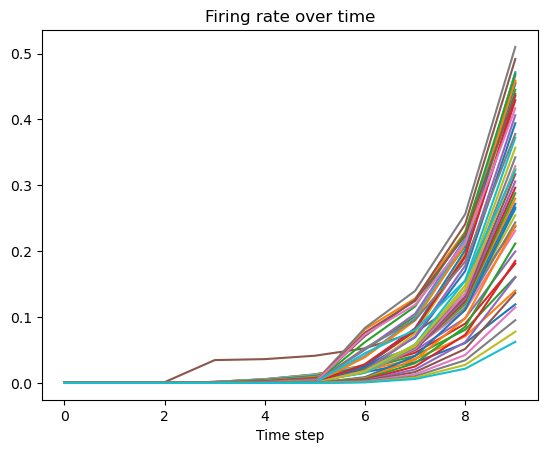

In [198]:
plt.title("Firing rate over time")
plt.xlabel("Time step")
plt.plot(solution.t, solution.y.T);